### UFO Sightings Analysis Application

In [1]:
pip install requests pandas matplotlib seaborn plotly dash

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

ufo = pd.read_csv("ufo-sightings-transformed.csv")
ufo.drop('Unnamed: 0', axis=1, inplace=True)  # dropping index column
ufo.info()
ufo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80328 entries, 0 to 80327
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_time                    80328 non-null  object 
 1   date_documented              80328 non-null  object 
 2   Year                         80328 non-null  int64  
 3   Month                        80328 non-null  int64  
 4   Hour                         80328 non-null  int64  
 5   Season                       80328 non-null  object 
 6   Country_Code                 80069 non-null  object 
 7   Country                      80069 non-null  object 
 8   Region                       79762 non-null  object 
 9   Locale                       79871 non-null  object 
 10  latitude                     80328 non-null  float64
 11  longitude                    80328 non-null  float64
 12  UFO_shape                    78398 non-null  object 
 13  length_of_encoun

,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...


In [3]:
# stats
ufo.describe()

,Year,Month,Hour,latitude,longitude,length_of_encounter_seconds
count,80328.000000,80328.000000,80328.000000,80328.000000,80328.000000,8.032800e+04
mean,2003.850463,6.835026,15.525172,38.124963,-86.772015,9.017336e+03
std,10.426547,3.234876,7.753750,10.469146,39.697805,6.202322e+05
min,1906.000000,1.000000,0.000000,-82.862752,-176.658056,1.000000e-03
25%,2001.000000,4.000000,10.000000,34.134722,-112.073333,3.000000e+01
50%,2006.000000,7.000000,19.000000,39.412500,-87.903611,1.800000e+02
75%,2011.000000,9.000000,21.000000,42.788333,-78.755000,6.000000e+02
max,2014.000000,12.000000,23.000000,72.700000,178.441900,9.783600e+07


In [4]:
# value counts to understand the most frequent shapes
print(ufo['UFO_shape'].value_counts())

UFO_shape
Light        16565
Triangle      7865
Circle        7607
Fireball      6208
Other         5649
Unknown       5584
Sphere        5387
Disk          5213
Oval          3733
Formation     2457
Cigar         2057
Changing      1962
Flash         1328
Rectangle     1296
Cylinder      1283
Diamond       1178
Chevron        952
Egg            759
Teardrop       750
Cone           316
Cross          233
Delta            7
Round            2
Crescent         2
Pyramid          1
Flare            1
Hexagon          1
Dome             1
Changed          1
Name: count, dtype: int64


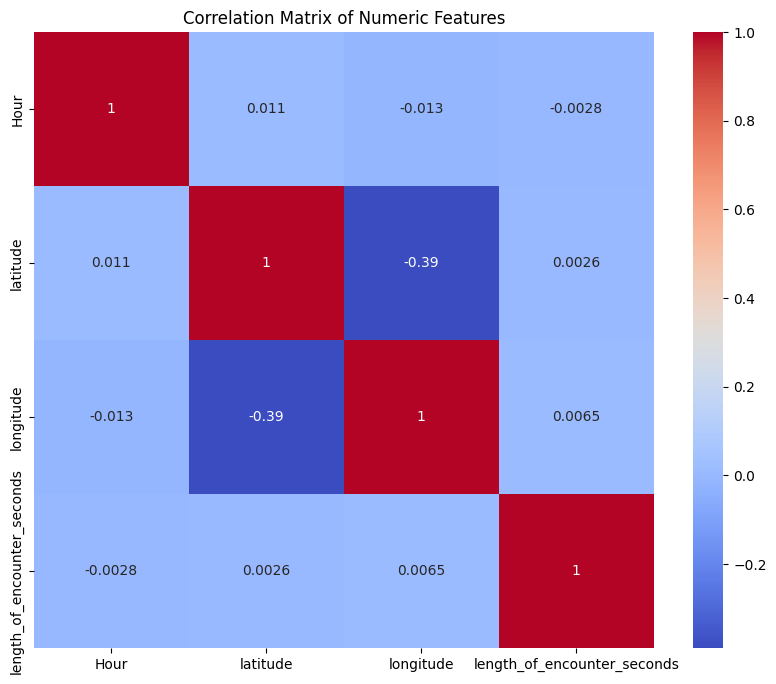

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# convert 'Date_time' to datetime format
ufo['Date_time'] = pd.to_datetime(ufo['Date_time'])

# using year, month, and day 
ufo['Year'] = ufo['Date_time'].dt.year
ufo['Month'] = ufo['Date_time'].dt.month
ufo['Day'] = ufo['Date_time'].dt.day

# DataFrame just the numeric columns
numeric_columns = ufo.select_dtypes(include=['int64', 'float64'])

# how different numeric values relate to each other
correlation_matrix = numeric_columns.corr()

# correlation matrix
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  
plt.title('Correlation Matrix of Numeric Features')  
plt.show()  

The correlation matrix shows weak relationships between numeric features. The latitude and longitude are slightly negatively correlated, -0.39, while other variables, such as **hour** and **length of encounter**, are almost uncorrelated, which means no strong patterns or dependencies.

In [7]:
import requests
import pandas as pd

# loading API
api_url = "https://nuforc-sightings-database-api.herokuapp.com/sightings"

# fetching the data from the API
response = requests.get(api_url)
if response.status_code == 200:
    data = response.json() 
    df = pd.DataFrame(data)
    # saving the dateframe as csv to make it more reliable 
    output_file = "ufo_sightings_api_data.csv"
    df.to_csv(output_file, index=False)
    print(f"Data successfully saved to {output_file}")
else:
    print(f"Failed to fetch data from the API. Status code: {response.status_code}")


Data successfully saved to ufo_sightings_api_data.csv


In [8]:
import pandas as pd

# Load the API data
api_df = pd.read_csv('ufo_sightings_api_data.csv')

# Display the current column names
print("Current API Data Columns:", api_df.columns)

Current API Data Columns: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14'],
      dtype='object')


In [9]:
print(api_df.head())

                0           1   2         3                          4  \
0  12/19/21 23:00    Branford  CT    Circle                        NaN   
1  12/19/21 00:15     Deltona  FL  Changing  1 minute, 9 seconds video   
2  12/18/21 21:45  Long Beach  CA  Triangle                3-5 seconds   
3  12/18/21 00:00   Charlotte  NC     Cigar       still active 12:35am   
4  12/17/21 23:30      Traver  CA      Oval                    2 hours   

                                                   5         6           7  \
0  See craft every evening when I get out of work...  12/19/21  20211219.0   
1  I was on Ring app in house and saw incredible ...  12/19/21  20211219.0   
2       3 Boomerang shaped craft flying in formation  12/19/21  20211218.0   
3  flying stick, the ends of it brighter. Recorde...  12/19/21  20211218.0   
4  ((HOAX))  near the Foster farms feed mill in T...  12/19/21  20211217.0   

        8     9    10                    11                    12  \
0  2021.0  12.0  

In [10]:
import pandas as pd

# loading kaggle dataset without the first irrelevant column 
df1 = pd.read_csv('ufo-sightings-transformed.csv', index_col=0)

# loading api that was turned into a csv
api_df = pd.read_csv('ufo_sightings_api_data_renamed.csv')

# looking for common columns for a smooth merge
df1_columns = df1.columns
api_df_columns = api_df.columns

(df1_columns, api_df_columns)

(Index(['Date_time', 'date_documented', 'Year', 'Month', 'Hour', 'Season',
        'Country_Code', 'Country', 'Region', 'Locale', 'latitude', 'longitude',
        'UFO_shape', 'length_of_encounter_seconds', 'Encounter_Duration',
        'Description'],
       dtype='object'),
 Index(['Date_time', 'City', 'State', 'UFO_shape', 'Duration', 'Comments',
        'Date_reported', 'Year', 'Month', 'Day', 'Time_of_day',
        'Duration_minutes', 'Report_link', 'Additional_comments'],
       dtype='object'))

In [11]:
print("Data type in df1:", df1['Date_time'].dtype)
print("Data type in api_df:", api_df['Date_time'].dtype)

# converting 'Date_time' to datetime format in both datasets
df1['Date_time'] = pd.to_datetime(df1['Date_time'], errors='coerce')
api_df['Date_time'] = pd.to_datetime(api_df['Date_time'], errors='coerce')

# checking changes
print("After conversion:")
print("Data type in df1:", df1['Date_time'].dtype)
print("Data type in api_df:", api_df['Date_time'].dtype)

Data type in df1: object
Data type in api_df: object


/var/folders/qv/jpfhtmx56dq643bqwf3wg02r0000gn/T/ipykernel_95210/236830801.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  api_df['Date_time'] = pd.to_datetime(api_df['Date_time'], errors='coerce')


After conversion:
Data type in df1: datetime64[ns]
Data type in api_df: datetime64[ns]


In [12]:
# looking for rows where Date_time wasn;t converted
print("Rows in df1 where 'Date_time' is NaT:")
print(df1[pd.isna(df1['Date_time'])].head(10))

print("Rows in api_df where 'Date_time' is NaT:")
print(api_df[pd.isna(api_df['Date_time'])].head(10))

Rows in df1 where 'Date_time' is NaT:
Empty DataFrame
Columns: [Date_time, date_documented, Year, Month, Hour, Season, Country_Code, Country, Region, Locale, latitude, longitude, UFO_shape, length_of_encounter_seconds, Encounter_Duration, Description]
Index: []
Rows in api_df where 'Date_time' is NaT:
       Date_time                      City State UFO_shape          Duration  \
136019       NaT             Atlantic City    NJ      Disk        30 minutes   
136020       NaT                   Norwich    VT    Circle        97 seconds   
136022       NaT                  Cohoctah    MI   Unknown            15 min   
136029       NaT             Grande Summit    PA     Light         5 minutes   
136032       NaT                Louisville    KY     Light        30 seconds   
136034       NaT           Washingtonville    NY      Disk  1hour 15 minutes   
136035       NaT  Iron Bridge (UK/England)   NaN     Light             2mins   
136037       NaT                  Santa Fe    NM     Othe

In [13]:
# droping rows with NaT in the Date_time column in api 
api_df = api_df.dropna(subset=['Date_time'])
print("Rows in api_df after dropping NaT in 'Date_time':", api_df.shape)

Rows in api_df after dropping NaT in 'Date_time': (136141, 14)


In [14]:
# merging the datasets on 'Date_time' for accurate results
merged_df = pd.merge(df1, api_df, on='Date_time', how='inner')
print("Shape of the merged DataFrame:", merged_df.shape)
print(merged_df.head())

Shape of the merged DataFrame: (125200, 29)
            Date_time date_documented  Year_x  Month_x  Hour  Season  \
0 1974-10-10 19:30:00       8/10/1999    1974       10    19  Autumn   
1 1974-10-10 21:30:00        2/1/2007    1974       10    21  Autumn   
2 1974-10-10 23:00:00       7/25/2004    1974       10    23  Autumn   
3 1975-10-10 17:00:00       2/14/2008    1975       10    17  Autumn   
4 1976-10-10 20:30:00        2/7/2014    1976       10    20  Autumn   

  Country_Code         Country          Region            Locale  ...  \
0          USA   United States   Massachusetts            Hudson  ...   
1          GBR  United Kingdom           Wales           Cardiff  ...   
2          USA   United States          Kansas            Hudson  ...   
3          USA   United States  South Carolina  North Charleston  ...   
4          USA   United States      Washington         Washougal  ...   

      Duration                                           Comments  \
0   45 Minutes 

In [15]:
class BaseAnalysis:
    def __init__(self, data):
        self.data = data
    
    def preprocess(self):
        print("Preprocessing data...")

class TemporalAnalysis(BaseAnalysis):
    def trend_over_time(self, date_column, frequency='Y'):
        print(f"Analyzing trends over time, grouped by {frequency}.")
        return self.data[date_column].groupby(self.data[date_column].dt.to_period(frequency)).count()

class GeographicalAnalysis(BaseAnalysis):
    def distribution_by_location(self, location_column):
        print(f"Analyzing geographical distribution by {location_column}.")
        return self.data[location_column].value_counts()

class PatternAnalysis(BaseAnalysis):
    def common_shapes(self, shape_column):
        print(f"Analyzing common UFO shapes from {shape_column}.")
        return self.data[shape_column].value_counts()

analysis = BaseAnalysis(merged_df)
analysis.preprocess()

temporal_analysis = TemporalAnalysis(merged_df)
trends = temporal_analysis.trend_over_time('Date_time')

geo_analysis = GeographicalAnalysis(merged_df)
distribution = geo_analysis.distribution_by_location('State')

pattern_analysis = PatternAnalysis(merged_df)
shapes = pattern_analysis.common_shapes('UFO_shape_x')

print(trends)
print(distribution)
print(shapes)

Preprocessing data...
Analyzing trends over time, grouped by Y.
Analyzing geographical distribution by State.
Analyzing common UFO shapes from UFO_shape_x.
Date_time
1974      388
1975      514
1976      449
1977      361
1978      472
1979      411
1980      354
1981      210
1982      269
1983      201
1984      238
1985      277
1986      224
1987      275
1988      295
1989      353
1990      349
1991      282
1992      299
1993      427
1994      549
1995     1446
1996     1108
1997     2563
1998     2452
1999     6104
2000     3728
2001     4300
2002     4228
2003     5426
2004     6853
2005     6365
2006     4972
2007     5600
2008     6595
2009     7544
2010     8762
2011     8372
2012    14279
2013    13596
2014     3710
Freq: Y-DEC, Name: Date_time, dtype: int64
State
CA                      13499
WA                       7269
FL                       6385
IL                       5759
NY                       5163
                        ...  
YT                         13
Y

In [16]:
class BaseAnalysis:
    def __init__(self, data):
        self.data = data
    
    def preprocess(self):
        print("Preprocessing data...")
        # converting Date_time to datetime format
        self.data['Date_time'] = pd.to_datetime(self.data['Date_time'], errors='coerce')
        print("Date_time converted to datetime.")

analysis = BaseAnalysis(merged_df)
analysis.preprocess()

temporal_analysis = TemporalAnalysis(analysis.data)
trends = temporal_analysis.trend_over_time('Date_time')
print(trends)

Preprocessing data...
Date_time converted to datetime.
Analyzing trends over time, grouped by Y.
Date_time
1974      388
1975      514
1976      449
1977      361
1978      472
1979      411
1980      354
1981      210
1982      269
1983      201
1984      238
1985      277
1986      224
1987      275
1988      295
1989      353
1990      349
1991      282
1992      299
1993      427
1994      549
1995     1446
1996     1108
1997     2563
1998     2452
1999     6104
2000     3728
2001     4300
2002     4228
2003     5426
2004     6853
2005     6365
2006     4972
2007     5600
2008     6595
2009     7544
2010     8762
2011     8372
2012    14279
2013    13596
2014     3710
Freq: Y-DEC, Name: Date_time, dtype: int64


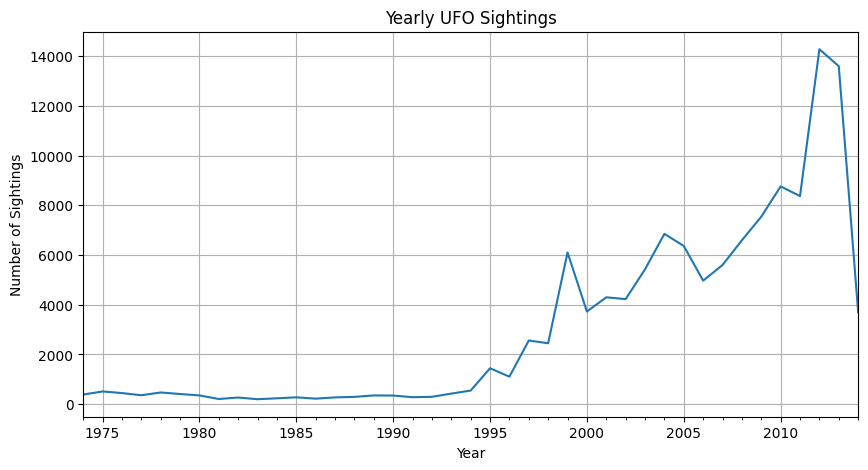

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

class DataHandler:
    def __init__(self, data):
        self.data = data

class DataVisualizer(DataHandler):
    def plot_trends(self, series):
        plt.figure(figsize=(10, 5))
        series.plot(kind='line')
        plt.title('Yearly UFO Sightings')
        plt.xlabel('Year')
        plt.ylabel('Number of Sightings')
        plt.grid(True)
        plt.show()
visualizer = DataVisualizer(trends)
visualizer.plot_trends(trends)

### Insights:
Starting from the mid-1990s, there is a sharp rise in the number of sightings until it peaks around 2012. Before the 1990s, the sightings were relatively stable and at a low level. This sudden rise could be because of greater media exposure, increased mechanisms for reporting, or other societal factors related to the fascination with UFO phenomena during this period. The sharp drop at the end may indicate incomplete data for the last year.

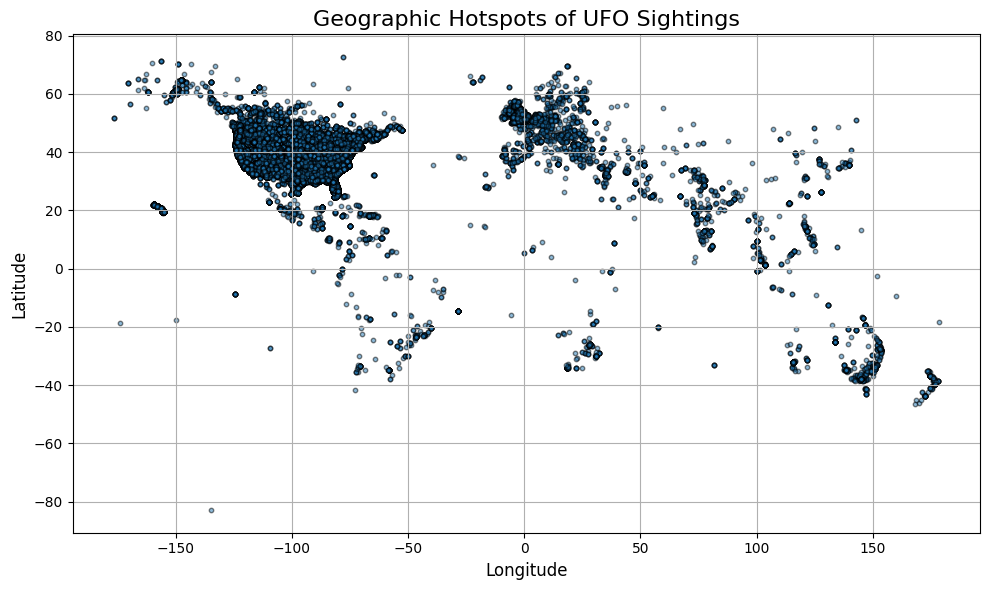

In [18]:
import matplotlib.pyplot as plt

merged_df['latitude'] = pd.to_numeric(merged_df['latitude'], errors='coerce')
merged_df['longitude'] = pd.to_numeric(merged_df['longitude'], errors='coerce')

# droping rows where latitude or longitude are NaN
merged_df.dropna(subset=['latitude', 'longitude'], inplace=True)
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['longitude'], merged_df['latitude'], alpha=0.5, s=10, edgecolor='k')
plt.title('Geographic Hotspots of UFO Sightings', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights:
Most of the sightings are from North America, especially in the United States, revealing a high tendency for more reporting in the region. Other noticeable clustering is depicted in Europe and parts of Australia, whereas regions of South America, Africa, and most of Asia have fewer sightings recorded. This reflects possible cultural or technological disparities, or different media-associated effects on reporting UFO phenomena across the world.

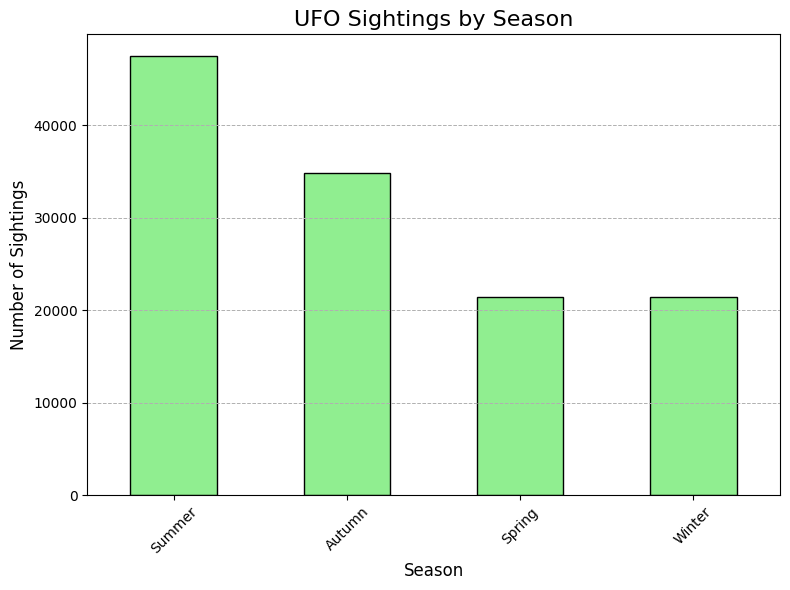

In [19]:
import matplotlib.pyplot as plt

# Counting sightings by season
seasonal_trends = merged_df["Season"].value_counts()
plt.figure(figsize=(8, 6))
seasonal_trends.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("UFO Sightings by Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Sightings", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", linewidth=0.7)
plt.tight_layout()
plt.show()

### Insights:
Summer has the highest number of sightings, followed by Autumn, while Spring and Winter have considerably fewer reports. This may be indicative of increased outdoor activity and clearer skies in the warmer months, leading to more sightings during summer and autumn.

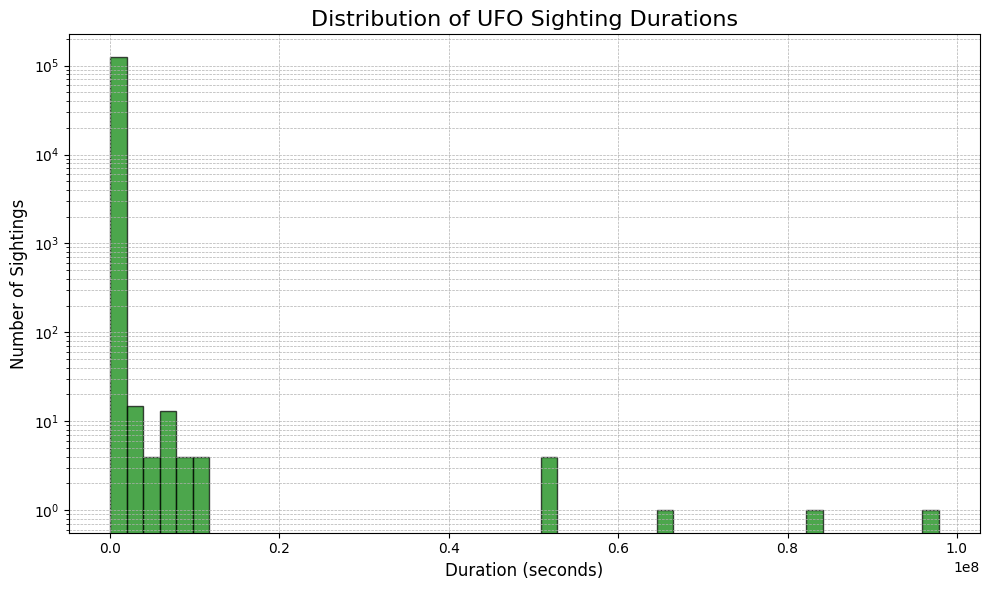

In [20]:
# converting duration column to numeric to plot duration analysis 
merged_df["length_of_encounter_seconds"] = pd.to_numeric(
    merged_df["length_of_encounter_seconds"], errors="coerce"
)
plt.figure(figsize=(10, 6))
plt.hist(
    merged_df["length_of_encounter_seconds"].dropna(),
    bins=50,
    color="green",
    alpha=0.7,
    edgecolor="black"
)
plt.title("Distribution of UFO Sighting Durations", fontsize=16)
plt.xlabel("Duration (seconds)", fontsize=12)
plt.ylabel("Number of Sightings", fontsize=12)
plt.yscale("log") 
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

### Insights:
Most of the sightings last for very short times, lying near the lower end, actually close to zero seconds. Extremely few of them have very long times, and these are thus viewed as outliers. It therefore follows that most UFO encounters are short, with very rare occurrences of extended times.

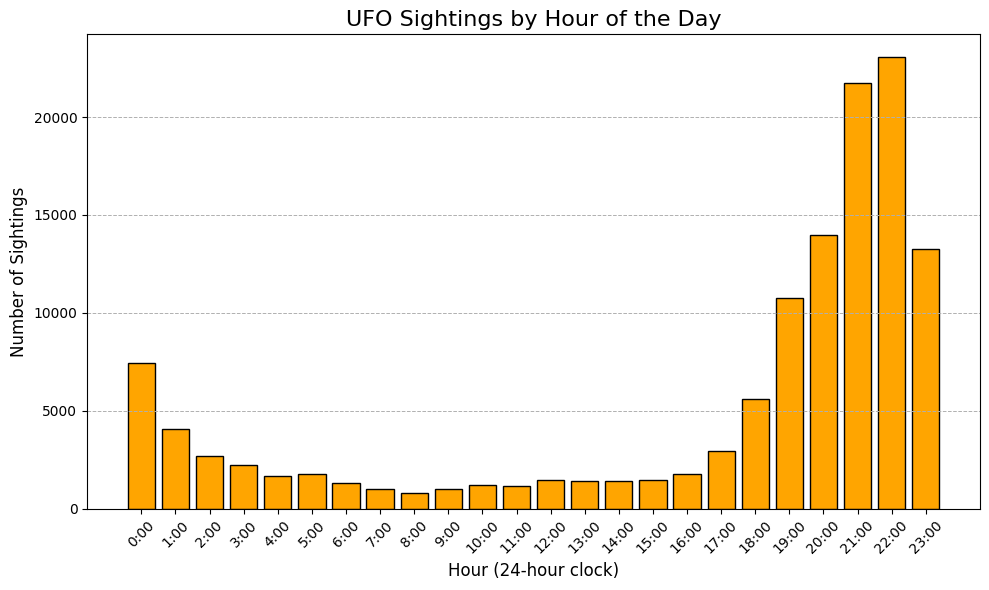

In [21]:
import matplotlib.pyplot as plt

# counting sightings by hour
hourly_trends = merged_df["Hour"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(hourly_trends.index, hourly_trends.values, color="orange", edgecolor="black")
plt.title("UFO Sightings by Hour of the Day", fontsize=16)
plt.xlabel("Hour (24-hour clock)", fontsize=12)
plt.ylabel("Number of Sightings", fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f"{i}:00" for i in range(0, 24)], rotation=45)
plt.grid(axis="y", linestyle="--", linewidth=0.7)
plt.tight_layout()
plt.show()

### Insights:
Most sightings take place at the end of nighttime, sharply increasing between 8:00 PM and 11:00 PM, peaking at about 9:00 and 10:00 PM. Then, the number goes way down during the early hours of the morning and reaches their bottom between 6:00 AM and 5:00 PM, showing UFO reports are much rarer in daytime. This could support that sightings are more visible during the evening or at night.

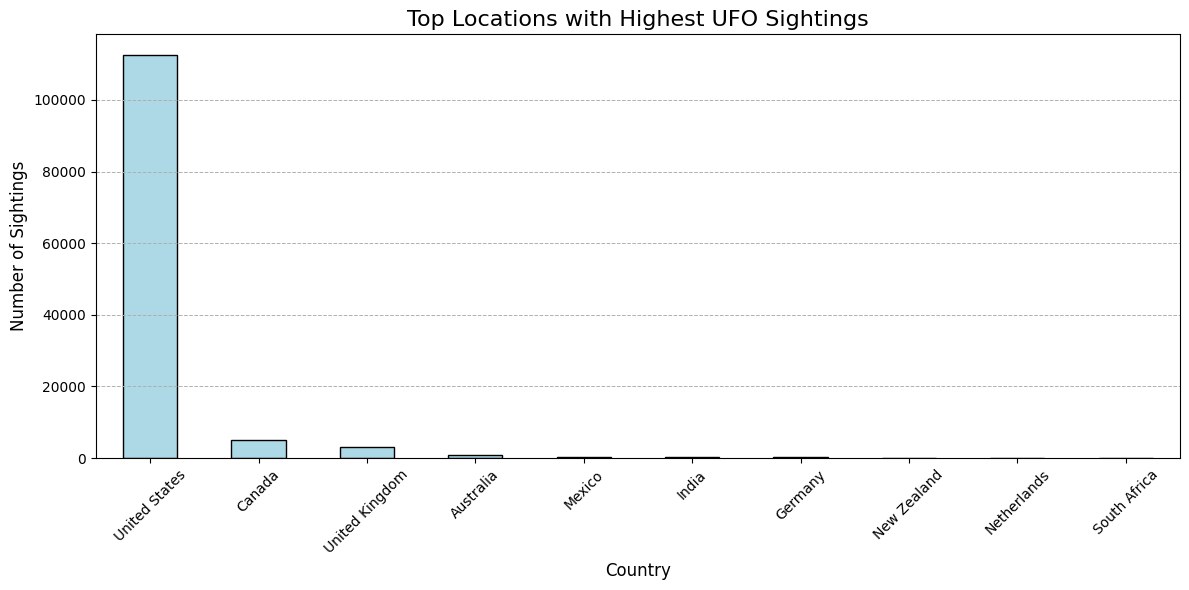

In [22]:
# grouping by location and counting sightings
location_sightings = merged_df.groupby("Country")["Date_time"].count().sort_values(ascending=False)
top_locations = location_sightings.head(10) 
plt.figure(figsize=(12, 6))
top_locations.plot(kind="bar", color="lightblue", edgecolor="black")
plt.title("Top Locations with Highest UFO Sightings", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Sightings", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", linewidth=0.7)
plt.tight_layout()
plt.show()

### Insights
Most of the data falls within the United States, which reports many more sightings than any other country. Following that are Canada and the United Kingdom, which are significantly lower in their counts. Other countries such as Australia, Mexico, and India show minimal reports about UFOs. It appears that UFO sightings are highly concentrated in the United States. This may be explained by the higher public interest, media reporting, or cultural factors.

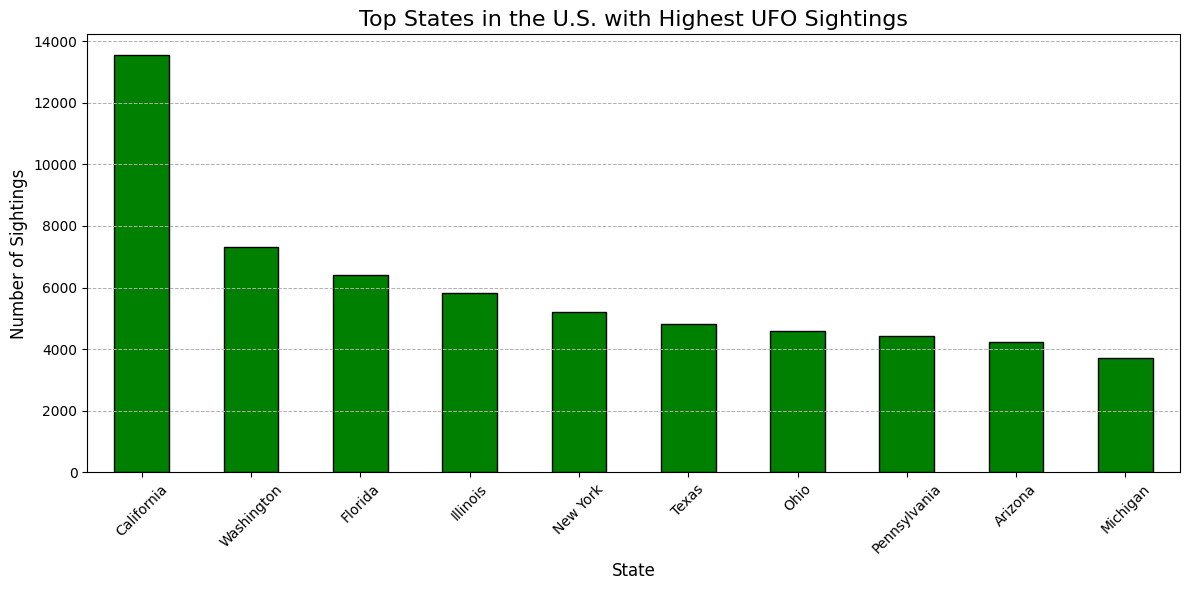

In [23]:
# filtering data for US and groupingby state
us_data = merged_df[merged_df["Country"] == "United States"]
state_sightings = us_data.groupby("Region")["Date_time"].count().sort_values(ascending=False)
top_states = state_sightings.head(10)  # Display top 10 states
plt.figure(figsize=(12, 6))
top_states.plot(kind="bar", color="green", edgecolor="black")
plt.title("Top States in the U.S. with Highest UFO Sightings", fontsize=16)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Sightings", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", linewidth=0.7)
plt.tight_layout()
plt.show()

### Insights:
California leads the charge by a wide margin, with close to 14,000 sightings, making it the most active state for UFO reports. Other notable states include Washington, Florida, and Illinois, but their counts are significantly lower. The distribution gradually decreases across other states, showing that sightings are concentrated in a few key states, likely due to population density, reporting awareness, or regional interest in UFO phenomena.

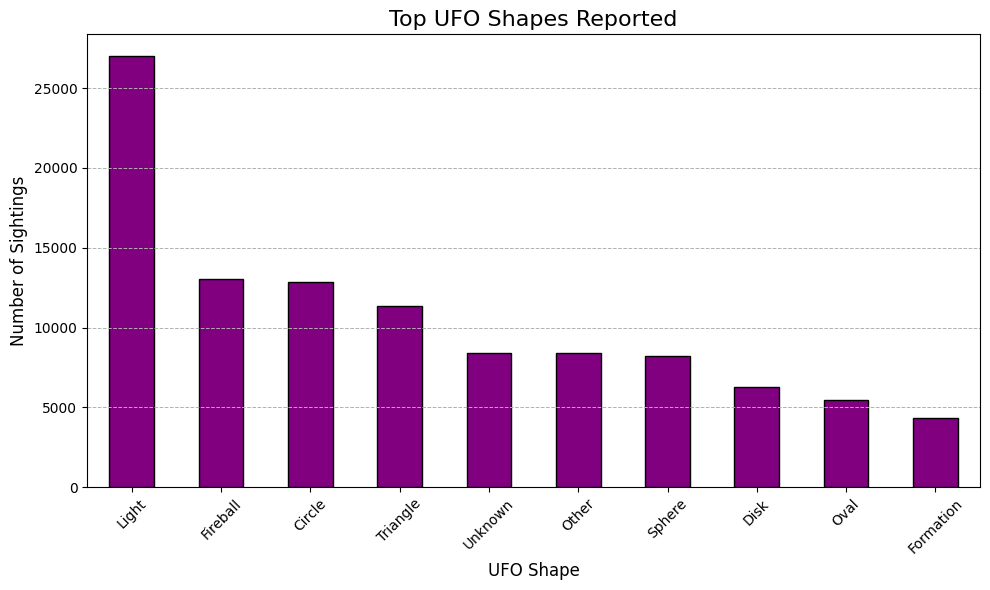

In [24]:
# counting UFO sightings by shape
shape_counts = merged_df["UFO_shape_x"].value_counts().head(10)  

plt.figure(figsize=(10, 6))
shape_counts.plot(kind="bar", color="purple", edgecolor="black")
plt.title("Top UFO Shapes Reported", fontsize=16)
plt.xlabel("UFO Shape", fontsize=12)
plt.ylabel("Number of Sightings", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", linewidth=0.7)
plt.tight_layout()
plt.show()

### Insights:
The dominant shape is "Light" with more than 26,000 sightings, making it the most frequently observed. "Fireball," "Circle," and "Triangle" follow closely behind with approximately 12,000 - 13,000 reports each. Other shapes like "Disk," "Oval," and "Formation" have far fewer sightings, suggesting they are either less common sightings or very difficult to define clearly. Overall, simpler or ambiguous shapes like "Light" and "Fireball" tend to be reported more frequently.

In [39]:
# pivot table for region and shapes reported
pivot_table = merged_df.pivot_table(
    values="Date_time",  
    index="Region",  
    columns="UFO_shape_x",  
    aggfunc="count",  
    fill_value=0  
)
pivot_table.columns = [f"Shape: {col}" for col in pivot_table.columns]
pivot_table.tail()


,Shape: Changing,Shape: Chevron,Shape: Cigar,Shape: Circle,Shape: Cross,Shape: Cylinder,Shape: Diamond,Shape: Disk,Shape: Egg,Shape: Fireball,Shape: Flash,Shape: Formation,Shape: Light,Shape: Other,Shape: Oval,Shape: Rectangle,Shape: Sphere,Shape: Teardrop,Shape: Triangle,Shape: Unknown
Region,,,,,,,,,,,,,,,,,,,,
Virginia,0,0,0,1,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,1
Washington,1,0,0,4,0,1,0,0,0,2,0,1,7,2,0,0,0,1,3,1
West Virginia,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0
Western Australia,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Wisconsin,0,0,0,0,1,0,2,0,0,1,0,1,4,0,0,0,1,0,0,0


### Insights:
This table highlights how sightings vary significantly by region and shape, with certain shapes like "Light" and "Circle" appearing more frequently across multiple areas.

In [40]:
import pandas as pd
import plotly.express as px

# Convert 'Duration' to numeric, coercing errors to NaN
merged_df['Duration'] = pd.to_numeric(merged_df['Duration'], errors='coerce')

# Optionally, fill NaN values with a value or drop them
merged_df.dropna(subset=['Duration'], inplace=True)  # Dropping rows where Duration is NaN

# Ensure latitude and longitude are in the correct data type
merged_df['latitude'] = pd.to_numeric(merged_df['latitude'], errors='coerce')
merged_df['longitude'] = pd.to_numeric(merged_df['longitude'], errors='coerce')

# Filter for a specific year and shape as an example
filtered_df = merged_df[(merged_df['Year_x'] == 1974) & (merged_df['UFO_shape_x'].isin(['All Shapes']))]

In [38]:
import dash
from dash import html, dcc
import plotly.express as px
from dash.dependencies import Input, Output

# initializing the Dash app
app = dash.Dash(__name__)

# layout of dashboard
app.layout = html.Div([
    html.H1("UFO Sightings Dashboard"),
    dcc.Graph(id='geo-map'),
    html.Label("Select a Year"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': str(i), 'value': i} for i in sorted(merged_df['Year_x'].unique())],
        value=sorted(merged_df['Year_x'].unique())[0],
        clearable=False
    ),
    html.Label("Select Shape of UFO"),
    dcc.Dropdown(
        id='shape-dropdown',
        options=[{'label': i, 'value': i} for i in merged_df['UFO_shape_x'].dropna().unique()],
        value='All Shapes',
        multi=True
    )
])

@app.callback(
    Output('geo-map', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('shape-dropdown', 'value')])
def update_map(selected_year, selected_shapes):
    # Ensure selected_shapes is a list
    if not selected_shapes:
        selected_shapes = ['All Shapes']

    filtered_df = merged_df[merged_df['Year_x'] == selected_year]
    if 'All Shapes' not in selected_shapes:
        filtered_df = filtered_df[filtered_df['UFO_shape_x'].isin(selected_shapes)]

    if filtered_df.empty:
        return {
            'data': [],
            'layout': {
                'title': 'No data available for selected criteria'
            }
        }

    # Proceed with creating the plot if data is available
    fig = px.scatter_geo(filtered_df,
                         lat='latitude',
                         lon='longitude',
                         hover_name='City',
                         size='Duration',
                         projection='natural earth')
    return fig


if __name__ == '__main__':
    app.run_server(debug=True)